# try to simulate the binary star system

rest-frame not care to calculate the center of mass

In [1]:
class System:
    def __init__(self):
        self.G = 6.67e-11
        self.m2 = 1e17
        self.m1 = 1e17

        self.upperPart = self.G*self.m1*self.m2 #just only Gm1m2

        self.x1, self.y1, self.z1 = 0, 0, 0
        self.vx1, self.vy1, self.vz1 = 10, 20, 30 #velocity part

        self.x2, self.y2, self.z2 = 3000, 0, 0
        self.vx2, self.vy2, self.vz2 = 0,40, 0

        self.t = 0
        self.dt = 0.5 # 1 day calc in to SI unit
        #dt just sep the orbit from 1 year to a day

    def calc_r(self):
        self.rx, self.ry, self.rz = self.x1-self.x2, self.y1-self.y2, self.z1-self.z2
        self.r_cube = (self.rx**2+self.ry**2+self.rz**2)**1.5 #r**3

    def calc_f(self):
        self.fx1 = -self.upperPart*self.rx/(self.r_cube)
        self.fy1 = -self.upperPart*self.ry/(self.r_cube)
        self.fz1 = -self.upperPart*self.rz/(self.r_cube)

        self.fx2 = -self.fx1
        self.fy2 = -self.fy1
        self.fz2 = -self.fz1

    def calc_v(self):
        self.vx1 += self.fx1/self.m1*self.dt
        self.vy1 += self.fy1/self.m1*self.dt
        self.vz1 += self.fz1/self.m1*self.dt

        self.vx2 += self.fx2/self.m2*self.dt
        self.vy2 += self.fy2/self.m2*self.dt
        self.vz2 += self.fz2/self.m2*self.dt

    def update_pos(self):
        self.x1 += self.vx1*self.dt
        self.y1 += self.vy1*self.dt
        self.z1 += self.vz1*self.dt

        self.x2 += self.vx2*self.dt
        self.y2 += self.vy2*self.dt
        self.z2 += self.vz2*self.dt

    def update_t(self):
        self.t += self.dt

In [2]:
s = System()

x1Ls, y1Ls, z1Ls = [], [], []
x2Ls, y2Ls, z2Ls = [], [], []

while s.t < 1440*s.dt:
    s.calc_r()
    s.calc_f()
    s.calc_v()
    s.update_pos()
    s.update_t()

    x1Ls.append(s.x1)
    y1Ls.append(s.y1)
    z1Ls.append(s.z1)

    x2Ls.append(s.x2)
    y2Ls.append(s.y2)
    z2Ls.append(s.z2)

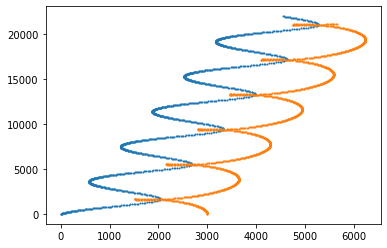

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x1Ls, y1Ls, s=1)
plt.scatter(x2Ls, y2Ls, s=1)

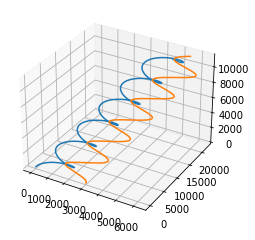

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1Ls, y1Ls, z1Ls)
ax.plot(x2Ls, y2Ls, z2Ls)